## 練習時間
#### 請寫一個函式用來計算 Mean Square Error
$ MSE = \frac{1}{n}\sum_{i=1}^{n}{(Y_i - \hat{Y}_i)^2} $

### Hint: [如何取平方](https://googoodesign.gitbooks.io/-ezpython/unit-1.html)

# [作業目標]
- 仿造範例的MAE函數, 自己寫一個MSE函數(參考上面公式)

# [作業重點]
- 注意程式的縮排
- 是否能將數學公式, 轉換為 Python 的函式組合? (In[2], Out[2])

In [2]:
# 載入基礎套件與代稱
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def mean_absolute_error(y, yp):
    """
    計算 MAE
    Args:
        - y: 實際值
        - yp: 預測值
    Return:
        - mae: MAE
    """
    mae = MAE =( sum(abs(y - yp)) )/ len(y)
    return mae

# 定義 mean_squared_error 這個函數, 計算並傳回 MSE
def mean_squared_error(y,yp):
    """
    請完成這個 Function 後往下執行
    """
    mse=MSE=sum((y-yp)**2)/len(y)
    return mse

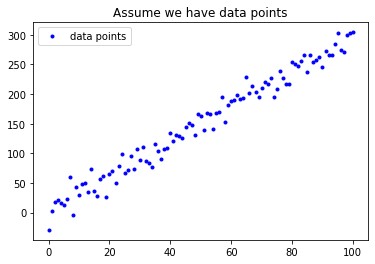

In [17]:
# 與範例相同, 不另外解說
w = 3
b = 0.5
x_lin = np.linspace(0, 100, 101)
y = (x_lin + np.random.randn(101) * 5) * w + b

plt.plot(x_lin, y, 'b.', label = 'data points')
plt.title("Assume we have data points")
plt.legend(loc = 2)
plt.show()

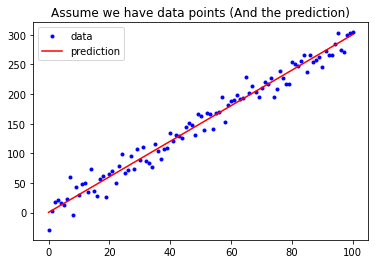

In [18]:
# 與範例相同, 不另外解說
y_hat = x_lin * w + b
plt.plot(x_lin, y, 'b.', label = 'data')
plt.plot(x_lin, y_hat, 'r-', label = 'prediction')
plt.title("Assume we have data points (And the prediction)")
plt.legend(loc = 2)
plt.show()

In [19]:
# 執行 Function, 確認有沒有正常執行
MSE = mean_squared_error(y, y_hat)
MAE = mean_absolute_error(y, y_hat)
print("The Mean squared error is %.3f" % (MSE))
print("The Mean absolute error is %.3f" % (MAE))

The Mean squared error is 202.334
The Mean absolute error is 11.345


# [作業2]

請上 Kaggle, 在 Competitions 或 Dataset 中找一組競賽或資料並寫下：

1. 你選的這組資料為何重要

2. 資料從何而來 (tips: 譬如提供者是誰、以什麼方式蒐集)

3. 蒐集而來的資料型態為何

4. 這組資料想解決的問題如何評估

# [作業3]

想像你經營一個自由載客車隊，你希望能透過數據分析以提升業績，請你思考並描述你如何規劃整體的分析/解決方案：

1. 核心問題為何 (tips：如何定義 「提升業績 & 你的假設」)

2. 資料從何而來 (tips：哪些資料可能會對你想問的問題產生影響 & 資料如何蒐集)

3. 蒐集而來的資料型態為何

4. 你要回答的問題，其如何評估 (tips：你的假設如何驗證)

作業2

選擇資料為：TaiwanStock  https://www.kaggle.com/linsam/taiwanstock?select=InstitutionalInvestorsBuySell.csv

2020上半年因為新冠病毒席捲全球，導致全球經濟受挫，以亞洲目前的經濟狀況不佳與逐漸控制的疫情情況下，著實是個股票進場時機，因此預測股票漲幅的意義在此時更具有期價值，資料來源自https://github.com/FinMind/FinMind 之API。

此資料優勢不僅可以使用API串接，並且每日更新，更方便寫入固定排程進行自動化分析與dashboard建置，理想化能夠進行每日股票預測，同時分析目標目前略估如下：

短期目標為選定幾支熱門股票進行每日漲跌預測分析。
中期則進行區間報酬率預測與目標漲跌幅度趨勢。
長期則要能提供趨勢最佳買賣時機點預測與購買量。

此分析方案搭配API能利用每日更新資料進行模型優化與校正，能更有效地進行模型改進與驗證。

註：該資料形態在kaggle上僅提供csv檔案，在API下載則是提供json檔案，使用API有requests上線 - 600/hr  如果有在FinMind官網註冊則上限可達到1500/hr。

作業3

針對在客車隊提升業績方式，先區分為兩方向為主：
一、分析業績收入最佳化。
二、減少空車期與發生空車返回情況。

假設某一地區內存在客人較多之區塊、業績總額較多的區塊，而非隨機分布，因此逐步分析如下：
一、
1.找出是否存在高業績之地區
2.司機於該區域內，每單位時間內的業績是否與交通高峰期(上班、下班)有明顯關聯。
3.如有關連則列出收入最高的前10位司機與後10位進行載客落點分析，找出期業績最佳化之地區與時序分布，分別針對交通高峰期與低峰期進行載客地點推薦，

二、
1.分析每趟的載客路徑、時間、業績在部分地區是否存在負相關，
2.分析是否存在以下兩種情況：
某地區載客路徑雖然特別遠，回程卻不容易載到客人，而發生大量空車期，例如郊區、深山。或者存在容易出現長距離單但回程仍容易有業績產生的甜蜜區。
3.找出容易發生空車期的載客起迄地點，並減少此地點的建議投放。

最終為提高總體車隊效益，進行載客時空投放建議時需評估業績分配，避免集中投入而降低預測效益。

資料蒐集方式需要蒐集每位計程車司機每趟載客時，跳錶開始與結算的時間、地點(GPS)、金額。
資料可藉由司機完成後回報、APP輸入或配合車上外掛電子跳表設備進行資料自動回傳，資料形態需有時間資料與空間資料(geometry)，以json或csv方便進入資料庫為主。

分析結果可將司機分為有載客時間投放建議與無建議兩組進行測驗，並對有建議組採用A/B test進行策略提供前後是否存在顯著業績提升。